- DQN (2014)
    - unstable & offline method
- TRPO（2015）: Trust Region Policy Optimization
- PPO 

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

- references
    - https://medium.com/@vladogim97/trpo-minimal-pytorch-implementation-859e46c4232e
    - https://github.com/DeepRLChinese/DeepRL-Chinese/blob/master/09_trpo.py
    - https://jonathan-hui.medium.com/rl-the-math-behind-trpo-ppo-d12f6c745f33

## policy gradient algorithm

In [2]:
# with baseline
# gradient ascent
Image(url='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*WsqKFAmxvmIrLW1Z7CoHFA.png', width=400)

## TRPO

- references
    - https://spinningup.openai.com/en/latest/algorithms/trpo.html
    - https://www.dropbox.com/s/bodgpysmm6lu998/l4-TRPO-PPO.pdf?e=1&dl=0

- $\pi_\theta$: a policy with parameters $\theta$.
    - $\pi_{\theta_k}$: old policy
    - off-policy, 通过引入 $\pi_{\theta_k}$ ($\pi_{\theta_{old}}$)
- ${\mathcal L}(\theta_k, \theta)$ is the surrogate advantage; (Surrogate Loss)
    - a measure of how policy $\pi_{\theta}$ performs relative to the old policy $\pi_{\theta_k}$ using data from the old policy:
- 需要特别注意的是 $D_{kl}(\theta\|\theta_k)$ 是一种 reverse 的形式；

### objectives

In [3]:
Image(url='https://spinningup.openai.com/en/latest/_images/math/23edf1f72f63a4729c40371c1481a36549a0b713.svg', width=400)

In [4]:
# A 是关于的 old policy
# Surrogate Loss
Image(url='https://spinningup.openai.com/en/latest/_images/math/ae8edab1e9c727bed15e54d4dda492382538b5fe.svg', width=400)

In [5]:
Image(url='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*pbhUlYWNamKq-2CE_Z8rUA.png', width=400)

In [6]:
Image(url='https://spinningup.openai.com/en/latest/_images/math/78a651e0ce4979bd3e17198594ad952ac20b9b45.svg', width=400)

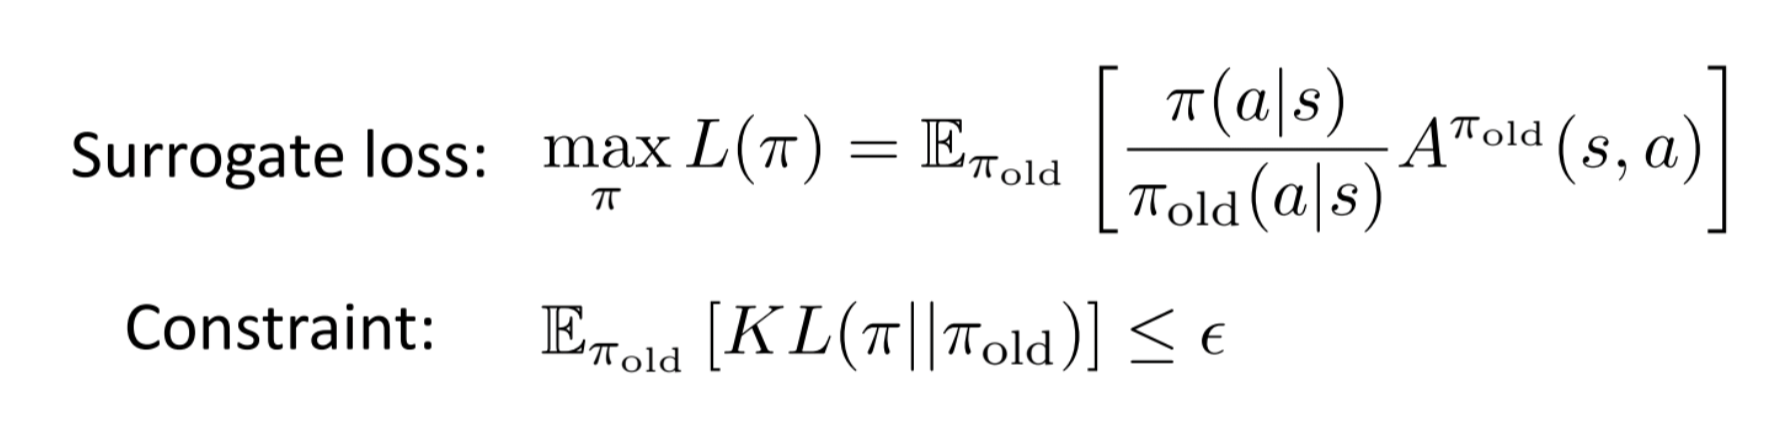

In [7]:
Image('../imgs/pieter_abbeel_trpo.png', width=400)

### approx

$$
\begin{split}
f(x)&=f(x_0)+f'(x_0)(x-x_0)+\frac12f''(x_0)(x-x_0)^2+\cdots\\
f(x)&=f(x_0)+g^T(x-x_0)+\frac12(x-x_0)^TH(x-x_0)+\cdots
\end{split}
$$

In [8]:
Image(url='https://spinningup.openai.com/en/latest/_images/math/7cdaa039734ec1d09adcc3e4dc351085823085cf.svg', width=400)

- $\mathcal L$（关于 w.r.t. $\theta$）的函数，现对其在 $\theta=\theta_k$ 处做一阶泰勒展开得
- $D_{kl}(\theta\|\theta_k)$ （关于 w.r.t. $\theta$）的函数，现对其在 $\theta=\theta_k$ 处做 2 阶泰勒展开得
    - 在TRPO中对KL散度进行二阶泰勒展开，并忽略0阶和1阶项，只保留二次项，是为了利用KL散度的局部曲率信息来控制策略更新的步长，保证更新的稳定性和效率。这种方法在约束优化问题中是常见的，特别是在需要控制优化步长以避免过大变动时。

In [9]:
Image(url='https://spinningup.openai.com/en/latest/_images/math/69c9dcbe2fe1c669a1b2cb3a312a479cdfcb27a1.svg', width=400)

## exactly analytically solution

- 对于上述有约束的优化问题，可以通过  Lagrangian duality 来求解

In [10]:
Image(url='../imgs/trpo_obj.png', width=400)

In [11]:
Image(url='../imgs/trpo_Lagrange_duality.png', width=400)

In [12]:
Image(url='https://spinningup.openai.com/en/latest/_images/math/e990f7ff0230a8fa93cf1242ea0d49fdf63d05d7.svg', width=400)

$$
\begin{split}
s&=H^{-1}g\\
\theta_{k+1}&=\theta_k+\sqrt{\frac{2\delta}{s^THs}}s
\end{split}
$$

- $s=H^{-1}g$: search direction
- $\sqrt{\frac{2\delta}{s^THs}}$: step length

## PPO

- https://spinningup.openai.com/en/latest/algorithms/ppo.html
- https://medium.com/aureliantactics/ppo-hyperparameters-and-ranges-6fc2d29bccbe
    - PPO is a **policy gradients** method that makes **policy updates** using a **surrogate loss function** to avoid catastrophic drops in performance.
        - surrogate loss function：代理（对原始目标函数的代理）损失函数，一个典型的例子就是 SVM

- svm 原始目标函数
  
    $$
    \begin{align*}
    &\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 \\
    &\text{subject to} \quad y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \quad \forall i
    \end{align*}
    $$

- svm 代理目标函数
  
    $$
    \min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i (\mathbf{w} \cdot \mathbf{x}_i + b))
    $$

### PPO-penalty (约束转目标)


$$
\begin{split}
&J_{TRPO}^{\theta'}(\theta) = \mathbb{E}_{(s_t, a_t) \sim \pi_{\theta'}} \left[ \frac{p_{\theta}(a_t | s_t)}{p_{\theta'}(a_t | s_t)} A^{\theta'}(s_t, a_t) \right]，\quad s.t.\quad KL(\theta,\theta')\lt \delta\\
&J^{\theta^k}(\theta) \approx \sum_{(s_t, a_t)} \frac{p_\theta(a_t | s_t)}{p_{\theta^k}(a_t | s_t)} A^{\theta^k}(s_t, a_t)
\end{split}
$$

- PPO-Penalty （PPO1） approximately solves a KL-constrained update like TRPO, but penalizes the KL-divergence in the objective function instead of making it a **hard constraint**, and automatically adjusts the penalty coefficient over the course of training so that it’s scaled appropriately.
    - 深度学习的训练优化过程（optimizer），其实是一个无约束的损失函数可导的迭代（梯度下降）优化算法；

    $$
    \begin{split}
    &J^{\theta'}_{PPO}=J^{\theta'}(\theta)-\beta KL(\theta,\theta'),\quad J^{\theta'}(\theta)=\mathbb E_{s_t,a_t\sim \pi_{\theta'}}\left[\frac{\pi_\theta(a_t|s_t)}{\pi_{\theta'}(a_t|s_t)}A^{\theta'}(s_t,a_t)\right]\\
    &\mathcal{L}^{\text{PENALTY}}(\theta) = \mathbb{E}_t \left[ \hat{A}_t \frac{\pi_\theta(a_t | s_t)}{\pi_{\theta_{\text{old}}}(a_t | s_t)} - \beta D_{KL} \left( \pi_{\theta_{\text{old}}}(\cdot | s_t) \parallel \pi_\theta(\cdot | s_t) \right) \right]
    \end{split}
    $$

- $\frac{\pi_\theta(a_t|s_t)}{\pi_\theta'(a_t|s_t)}$ 概率比，是一个 ratio（没有单位和量纲）
- 如何理解 $KL(\theta, \theta')$ 呢：
    - 其刻画的不是参数上的距离，而是行为上的距离，给定（同样的） $s_t$，会输出一个动作空间上的**概率分布** $\pi(a_t|s_t)$，目标函数中的 kl div 度量的是 $\pi_\theta(a_t|s_t)$ 与 $\pi_{\theta'}(a_t|s_t)$ 两个分布的距离，进一步把尽可能多不同的 $s$，求 kl div，平均起来，便是两个 actor（new vs. old）的 kl div；
- trick，$\beta$ 可以动态调整和变化（Adaptive KL penalty）
    - if $KL(\theta, \theta^k)\gt KL_\max$, 增加 $\beta$
    - if $KL(\theta, \theta^k)\lt KL_\min$, 降低 $\beta$

### PPO-clip （PPO2）

In [13]:
Image(url='https://spinningup.openai.com/en/latest/_images/math/99621d5bcaccd056d6ca3aeb48a27bf8cc0e640c.svg', width=600)


$$
J_{PPO2}^{\theta^k}(\theta) \approx \sum_{(s_t, a_t)} \min \left( \frac{p_\theta(a_t | s_t)}{p_{\theta^k}(a_t | s_t)} A^{\theta^k}(s_t, a_t), \ 
\text{clip} \left( \frac{p_\theta(a_t | s_t)}{p_{\theta^k}(a_t | s_t)}, 1 - \epsilon, 1 + \epsilon \right) A^{\theta^k}(s_t, a_t) \right)
$$

- kl div free，不再需要计算复杂的 kl div
- $A^{\theta'}(s_t,a_t)\gt 0$ 意味着 $(s_t,a_t)$ 的 pair 是好的，我们就希望增加 $\pi_\theta(a_t|s_t)$，但出于训练的稳定性，也不能 update 太多；反之亦然；

In [14]:
# Define the clipping function with epsilon
def clip(x, epsilon=0.2):
    return np.minimum(np.maximum(x, 1 - epsilon), 1 + epsilon)

# Generate values for x
x = np.linspace(0.5, 1.5, 500)

# Compute the clipped values
y = clip(x)

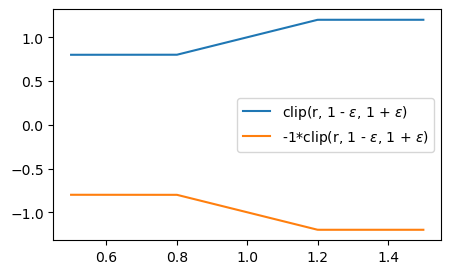

In [22]:
# 横轴表示ratio
plt.figure(figsize=(5, 3))
plt.plot(x, y, label=r'clip(r, 1 - $\epsilon$, 1 + $\epsilon$)')
plt.plot(x, -y, label=r'-1*clip(r, 1 - $\epsilon$, 1 + $\epsilon$)')
plt.legend()

In [16]:
# Image(url='../imgs/ppo_clip_curve.png', width=400)

In [17]:
def ppo_clip(A, r, epsilon=.2):
    return np.minimum(A * r, clip(r, epsilon) * A)

In [18]:
Image(url='https://miro.medium.com/v2/resize:fit:720/format:webp/1*rSpNhA8WkB0QqefM3vBYtA.png', width=400)

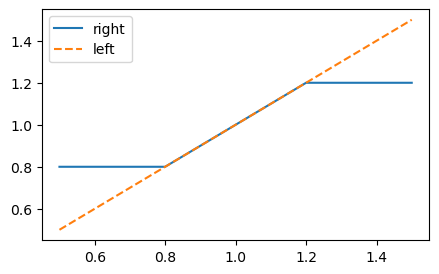

In [19]:
plt.figure(figsize=(5, 3))
plt.plot(x, clip(x), label=r'right')
plt.plot(x, x, '--', label=r'left')
plt.legend()

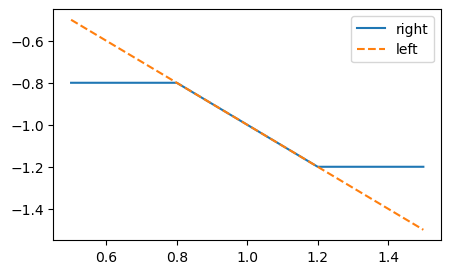

In [20]:
plt.figure(figsize=(5, 3))
plt.plot(x, -1*clip(x), label=r'right')
plt.plot(x, -x, '--', label=r'left')
plt.legend()

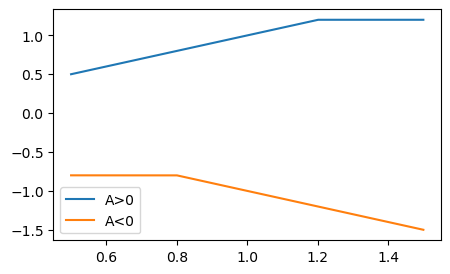

In [21]:
plt.figure(figsize=(5, 3))
plt.plot(x, ppo_clip(1, x), label=r'A>0')
plt.plot(x, ppo_clip(-1, x), label=r'A<0')
plt.legend()